In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import glob



Text(0, 0.5, 'Force (kN)')

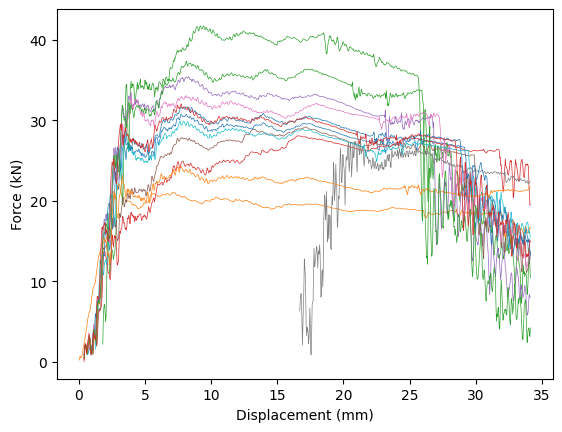

In [5]:
for i in range(1, 15):
    df = pd.read_csv('Simulation_BENDING/Bending_extreme_values/BENDING_X_data.csv/BENDING_'+str(i)+'_data.csv')
    plt.plot(df['DMM'], df['FKN'], linewidth=0.5)
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (kN)')

ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

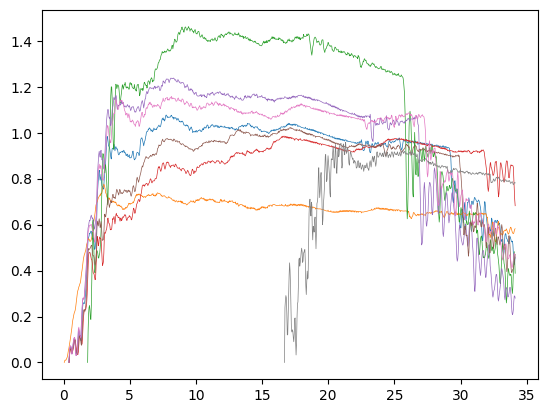

In [7]:
# Calculate energy
energy_df = pd.DataFrame()

for test_number in range(1, 15):
    df = pd.read_csv('Simulation_BENDING/Bending_extreme_values/BENDING_X_data.csv/BENDING_'+str(test_number)+'_data.csv')
    energy_array = [0]
    for i in range (1, len(df)):
        delta_displacement = (df['DMM'].iloc[i] - df['DMM'].iloc[i-1])
        mean_force = (df['FKN'].iloc[i-1] + df['FKN'].iloc[i])/2
        energy_array.append(mean_force * delta_displacement)
    energy_sum_df = pd.DataFrame({'Energy': [sum(energy_array)]})
    energy_df = pd.concat([energy_df, energy_sum_df], ignore_index=True)
    plt.plot(df['DMM'], energy_array, linewidth=0.5)

    

In [ ]:
print(energy_df)

        Energy
0   764.079973
1   800.492940
2   807.657190
3   757.578459
4   792.833828
..         ...
95  799.705783
96  755.083668
97  897.088707
98  832.334486
99  834.075810

[100 rows x 1 columns]


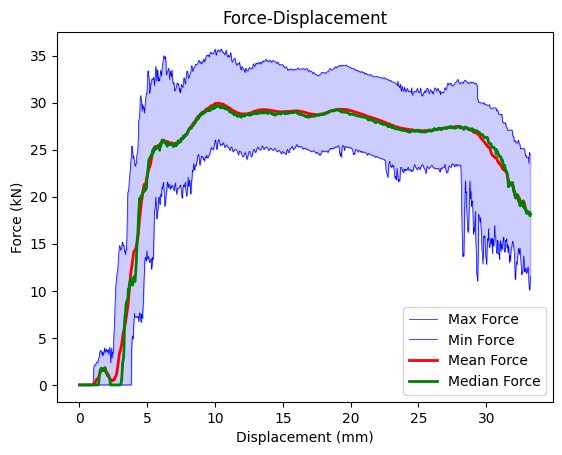

In [ ]:
# Assuming the files are in a folder called 'Simulation_BENDING/Bending_extreme_values'
folder_path = 'Simulation_BENDING/Bending_extreme_values/BENDING_X_data.csv'
file_pattern = os.path.join(folder_path, 'BENDING_*_data.csv')
file_list = glob.glob(file_pattern)

# Initialize lists to hold all the data
all_force_data = []

# Read each file and append the force data to the list
for file in file_list:
    df = pd.read_csv(file)
    displacement = df['DMM']  # Assuming 'DMM' is the displacement column
    force = df['FKN']         # Assuming 'FKN' is the force column
    all_force_data.append(force)

# Convert the list of series into a DataFrame
force_data_df = pd.concat(all_force_data, axis=1)

# Calculate max, min, and mean values across columns for each displacement
max_force = force_data_df.max(axis=1)
min_force = force_data_df.min(axis=1)
mean_force = force_data_df.mean(axis=1)
median_force = force_data_df.median(axis=1)


# Now plot these as functions of displacement
plt.plot(displacement, max_force, label='Max Force', linewidth=0.5, color='blue')
plt.plot(displacement, min_force, label='Min Force', linewidth=0.5, color='blue')
plt.plot(displacement, mean_force, label='Mean Force', linewidth=2, color='red')
plt.plot(displacement, median_force, label='Median Force', linewidth=2, color='green')
plt.fill_between(displacement, min_force, max_force, color='blue', alpha=0.2)

# Add labels and legend
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (kN)')
plt.title('Force-Displacement')
plt.legend()

plt.show()


In [ ]:
max_force_df = pd.DataFrame()
parameters = pd.read_csv('Simulation_BENDING/parameters_v1.csv')
for i in range(100):
    new_data = pd.read_csv('Simulation_BENDING/Bending_extreme_values/BENDING_X_data.csv/BENDING_'+str(i+1)+'_data.csv')
    max_force = new_data['FKN'].max()
    new_data_df = pd.DataFrame()
    new_data_df['max_force'] = [max_force]
    for parameter in parameters.columns:
        new_data_df[parameter] = parameters[parameter][i]
    max_force_df = pd.concat([max_force_df, new_data_df])

max_force_df.reset_index(drop=True, inplace=True)
max_force_df = max_force_df.drop(columns=['sample'])

max_force_df.head()

,max_force,outer_wall_tickness,inside_wall_side_tickness,inside_wall_middle_tickness,height,width,sigma0,youngs
0,28.824824,2.50,2.15,1.63,75.95,127.83,263.44,66771.2
1,30.512357,2.83,2.02,1.44,75.76,127.25,246.66,69501.7
2,29.328930,2.85,1.78,1.44,76.51,127.53,243.62,65759.5
3,28.711674,2.71,1.72,1.51,75.41,127.61,258.13,65259.4
4,29.108949,2.67,1.74,1.65,76.22,128.53,261.38,65053.8


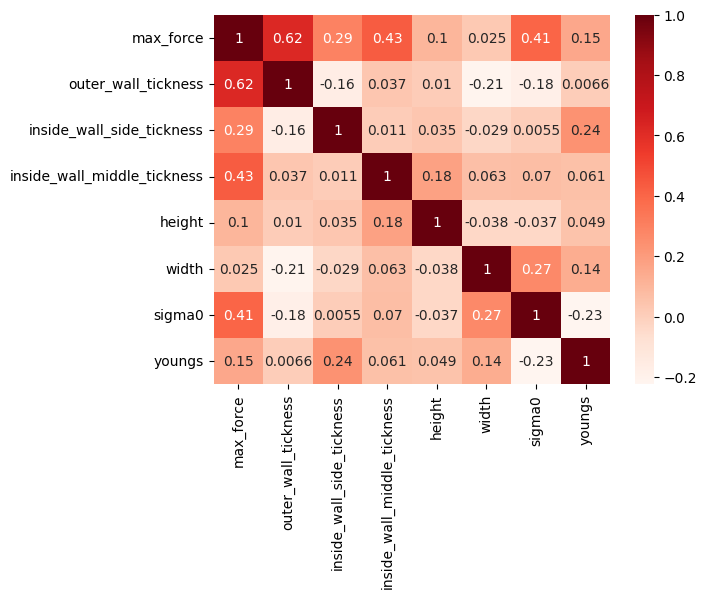

In [ ]:
dataplot = sb.heatmap(max_force_df.corr(), cmap="Reds", annot=True)  
plt.show()

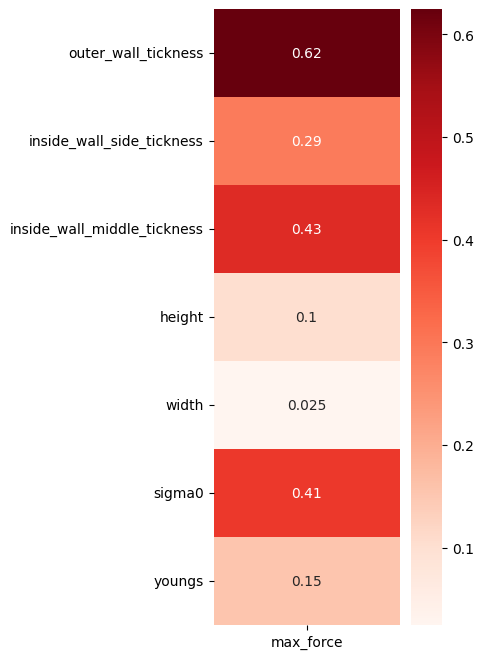

In [ ]:
correlation_matrix = max_force_df.corr()
fkn_correlation = correlation_matrix[['max_force']].drop('max_force')

plt.figure(figsize=(3, 8))  # Adjust the size to fit your particular needs
sb.heatmap(fkn_correlation, annot=True, cmap='Reds', cbar=True)
plt.show()

In [ ]:
mean_force_df = pd.DataFrame()

for i in range(100):
    new_data = pd.read_csv('Simulation_BENDING/Bending_extreme_values/BENDING_X_data.csv/BENDING_'+str(i+1)+'_data.csv')
    mean_force = new_data['FKN'].mean()
    new_data_df = pd.DataFrame()
    new_data_df['mean_force'] = [mean_force]
    for parameter in parameters.columns:
        new_data_df[parameter] = parameters[parameter][i]
    mean_force_df = pd.concat([mean_force_df, new_data_df])

mean_force_df.reset_index(drop=True, inplace=True)
mean_force_df = mean_force_df.drop(columns=['sample'])

mean_force_df.head()

,mean_force,outer_wall_tickness,inside_wall_side_tickness,inside_wall_middle_tickness,height,width,sigma0,youngs
0,21.819472,2.50,2.15,1.63,75.95,127.83,263.44,66771.2
1,22.857998,2.83,2.02,1.44,75.76,127.25,246.66,69501.7
2,23.065457,2.85,1.78,1.44,76.51,127.53,243.62,65759.5
3,21.634743,2.71,1.72,1.51,75.41,127.61,258.13,65259.4
4,22.638904,2.67,1.74,1.65,76.22,128.53,261.38,65053.8


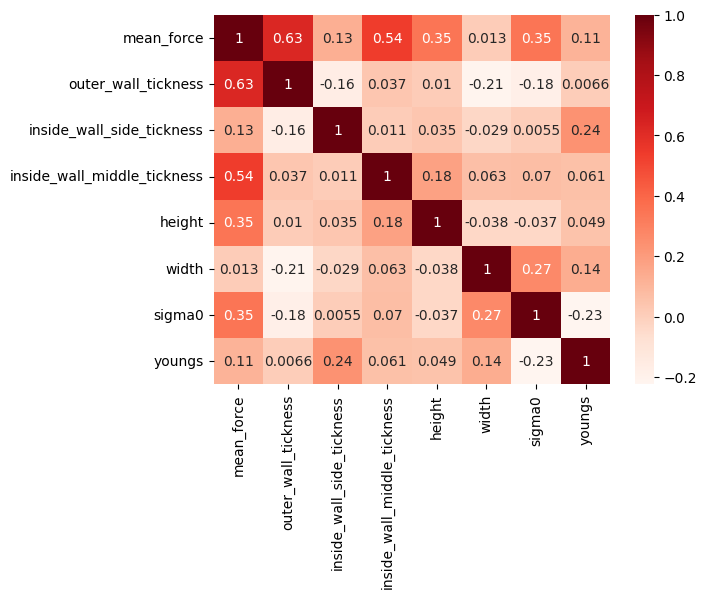

In [ ]:
dataplot = sb.heatmap(mean_force_df.corr(), cmap="Reds", annot=True)  
plt.show()

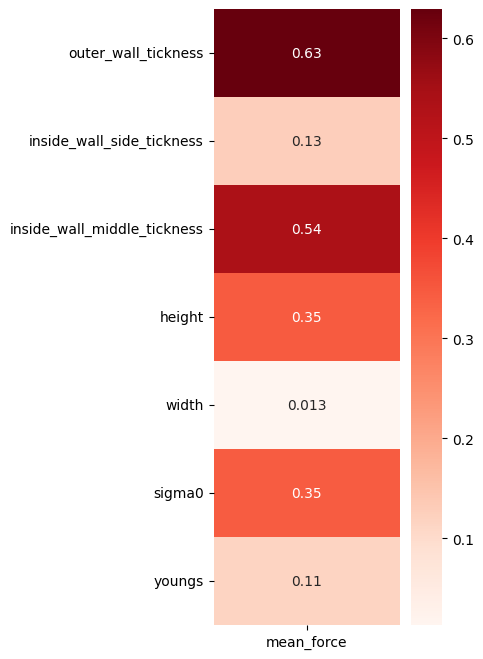

In [ ]:
correlation_matrix = mean_force_df.corr()
fkn_correlation = correlation_matrix[['mean_force']].drop('mean_force')

plt.figure(figsize=(3, 8))
sb.heatmap(fkn_correlation, annot=True, cmap='Reds', cbar=True)
plt.show()

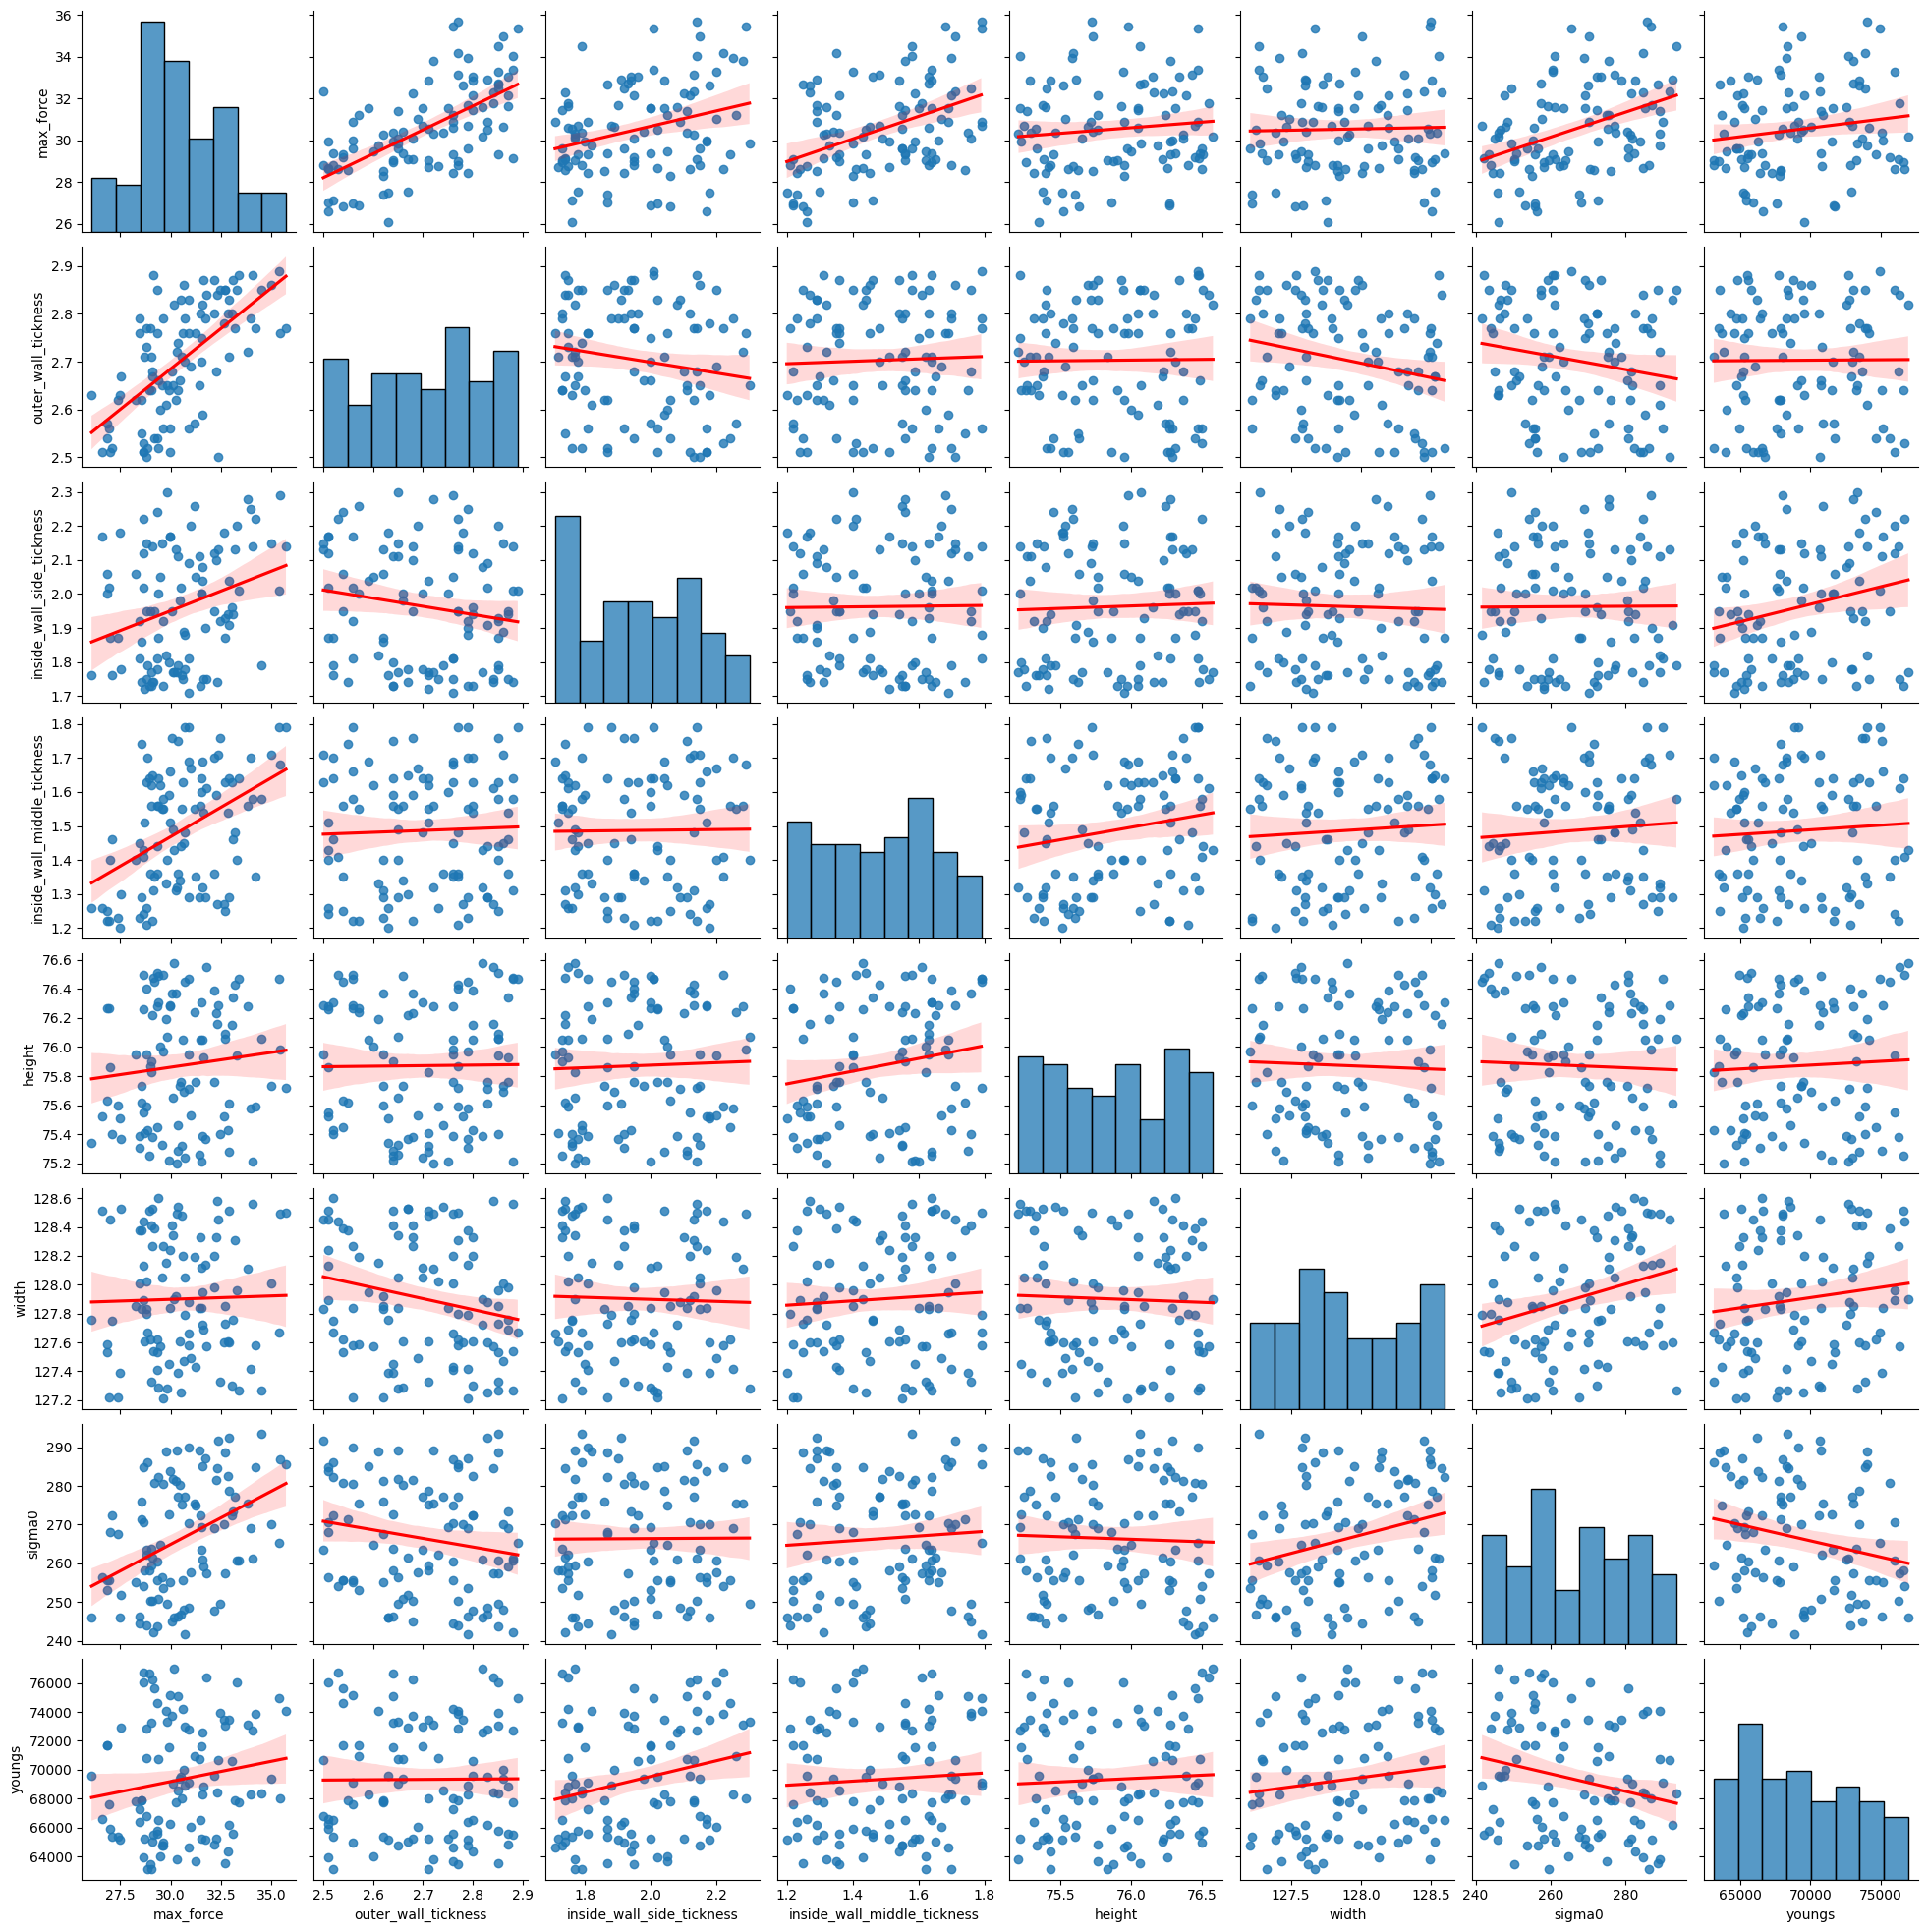

In [ ]:
sb.pairplot(max_force_df, kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [ ]:
main_df = mean_force_df.join(max_force_df['max_force'])
main_df = main_df.join(energy_df['Energy'])
header = parameters.columns.tolist()[1:]
main_df = main_df[['Energy', 'mean_force', 'max_force'] + header]
main_df.head()

,Energy,mean_force,max_force,outer_wall_tickness,inside_wall_side_tickness,inside_wall_middle_tickness,height,width,sigma0,youngs
0,764.079973,21.819472,28.824824,2.50,2.15,1.63,75.95,127.83,263.44,66771.2
1,800.492940,22.857998,30.512357,2.83,2.02,1.44,75.76,127.25,246.66,69501.7
2,807.657190,23.065457,29.328930,2.85,1.78,1.44,76.51,127.53,243.62,65759.5
3,757.578459,21.634743,28.711674,2.71,1.72,1.51,75.41,127.61,258.13,65259.4
4,792.833828,22.638904,29.108949,2.67,1.74,1.65,76.22,128.53,261.38,65053.8


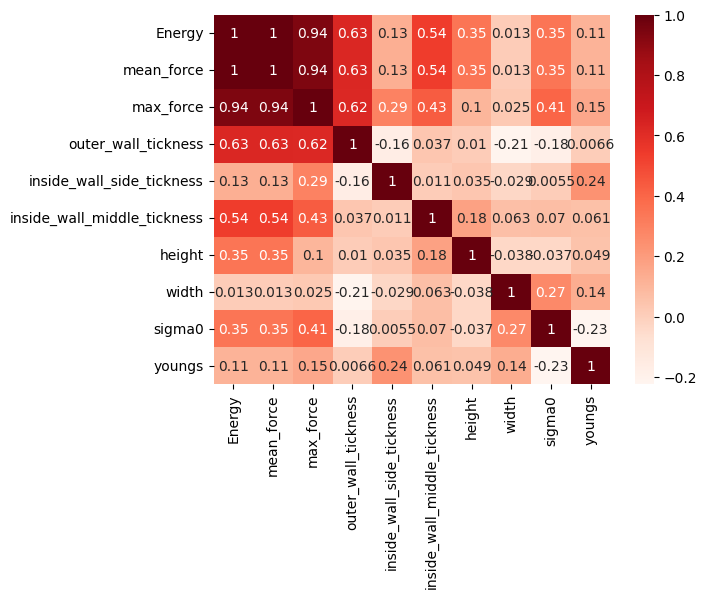

In [ ]:
dataplot = sb.heatmap(main_df.corr(), cmap="Reds", annot=True)  
plt.show()

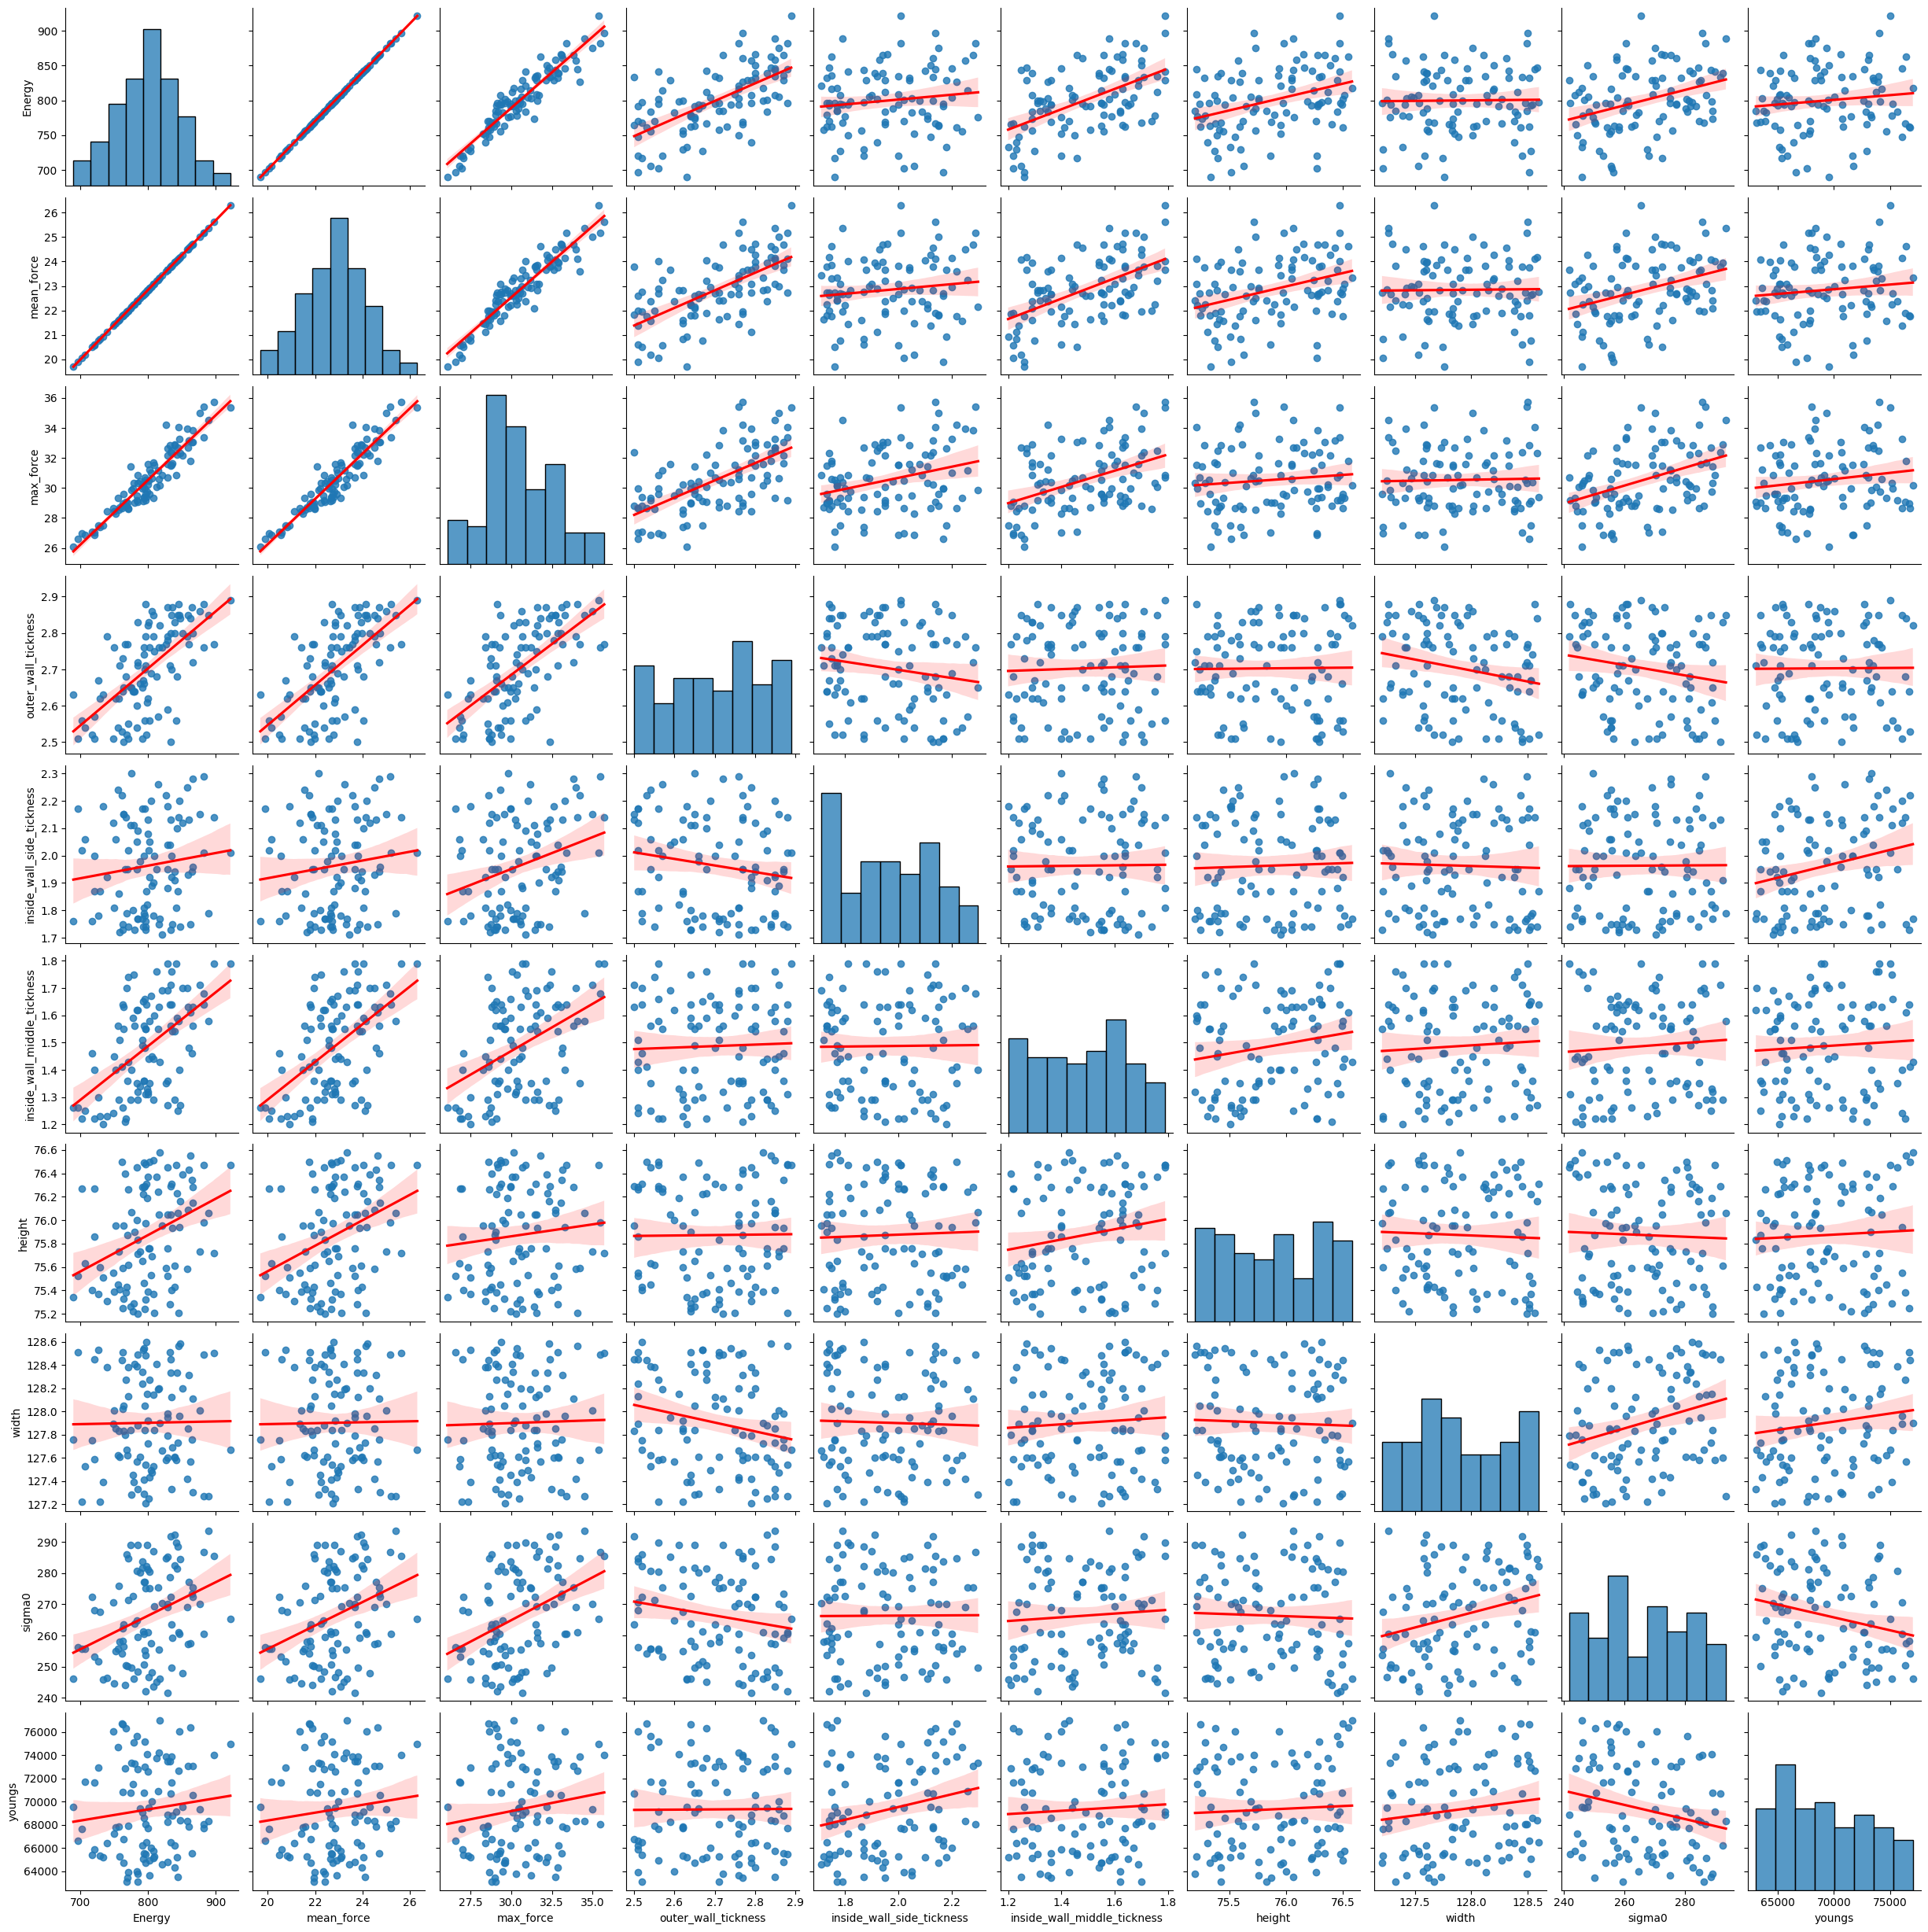

In [ ]:
sb.pairplot(main_df, kind='reg', plot_kws={'line_kws':{'color':'red'}})